In [4]:
!pip install tpot sweetviz

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.4/135.4 kB 6.3 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=22f147e2089eaacce81c5c2b2c80b4547e080ff9a05a631aa63c8e35b23ca96c
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


## MLOPS Group 13 , Group Members
### NISHI CHANDRA - 2022AC05351
### DEBARATI CHATTERJEE - 2022AC05747
### GAURAV CHAND - 2022AC05530
### V V R V CHAITANYA - 2022AC05211
### ANNE CHAITHANYA - 2022ac05473

**1. Data Collection and Preprocessing**

In [5]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tpot import TPOTClassifier

In [6]:
# Read the data
df = pd.read_csv('../input/diabetes-data-set/diabetes.csv')

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


data is numric

In [11]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- the min value in  5 columns = 0 (Glucose, BloodPressure, Skin Thickness, Insulin, BMI) which will be considered as null values<br>
- In skin Thickness and Insulin Column less than or equal 25% of the data are null values
- look at the maximum Insulin Value = 846 wich is too high u will never find a person with this insulin value (outlier)<br>
all this an errors in data collection

In [12]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**Data PreProcessing**

In [13]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0, np.NaN)

In [14]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [16]:
df[df.Glucose.notnull()]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [17]:
df[['Glucose', 'Outcome']].groupby(['Outcome'])[['Glucose']].median().reset_index()

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [18]:
# The missing values will be filled with the median values of each variable.
def median_target(var):
    temp = df[df[var].notnull()] # Assign the not NAN values of specific column to the variable temp
    temp = temp[[var, 'Outcome']].groupby(['Outcome'])[[var]].median().reset_index() # groupby outcome and calculate the median for each outcome
    return temp

In [19]:
median_target('Glucose')

,Outcome,Glucose
0,0,107.0
1,1,140.0


In [22]:
# The values to be given for incomplete observations are given the median value of people who are not sick and the median values of people who are sick.
columns = df.columns
columns = columns.drop("Outcome")
for col in columns:

    df.loc[(df['Outcome'] == 0 ) & (df[col].isnull()), col] = median_target(col)[col][0]
    df.loc[(df['Outcome'] == 1 ) & (df[col].isnull()), col] = median_target(col)[col][1]

In [23]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


**detect outliers with IQR score rule**


a brief description: <br>
IQR score The rule of thumb is that anything not in the range of (Q1 - 1.5 IQR) and (Q3 + 1.5 IQR) is an outlier, and can be removed.

Q1 is = 25% percintile value of the data<br>
Q3 is = 75% Percintile value of the data<br>
IQR = Q3 - Q1

In [69]:
#autoeda

import sweetviz as sv

report = sv.analyze(df)
report.show_html()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 12.4 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [24]:
Q1 = df["Glucose"].quantile(0.25)
Q3 = df["Glucose"].quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

print(f"Q1 = {Q1}\nQ3 = {Q3}\nIQR = {IQR}\nlower = {lower}\nupper = {upper}")
print(f"\n\nConclusion: Any value not in this range (lower and upper) = {lower, upper} can be removed as an outlier")

Q1 = 99.75
Q3 = 140.25
IQR = 40.5
lower = 39.0
upper = 201.0


Conclusion: Any value not in this range (lower and upper) = (39.0, 201.0) can be removed as an outlier


In [25]:
#looping on all the features to see which feature has an outliers
#but with this rule we will take Q1 = 5% and Q3 = 95%
for feature in df:
    Q1 = df[feature].quantile(0.05)
    Q3 = df[feature].quantile(0.95)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR

    if df[(df[feature] > upper)].any(axis=None) and df[(df[feature] < lower)].any(axis=None):
        print(feature,"yes")
    else:
        print(feature, "no")

Pregnancies no
Glucose no
BloodPressure no
SkinThickness no
Insulin no
BMI no
DiabetesPedigreeFunction no
Age no
Outcome no


So we have no outliers to remove

In [26]:
df2 = df.copy()
df2.Outcome = df2.Outcome.apply(lambda x:'Healthy' if x == 0 else 'Sick')
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick


In [27]:
df2.nunique()

,0
Pregnancies,17
Glucose,135
BloodPressure,47
SkinThickness,50
Insulin,187
BMI,247
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [28]:
df2.Outcome.value_counts()

,count
Outcome,
Healthy,500
Sick,268


In [34]:
# According to BMI, some ranges were determined and categorical variables were assigned.

NewBMI = pd.Series(["Underweight", "Normal", "Overweight", "Obesity 1", "Obesity 2", "Obesity 3"], dtype = "category")

df2["NewBMI"] = NewBMI

df2.loc[df["BMI"] < 18.5, "NewBMI"] = NewBMI[0]

df2.loc[(df["BMI"] > 18.5) & (df["BMI"] <= 24.9), "NewBMI"] = NewBMI[1]
df2.loc[(df["BMI"] > 24.9) & (df["BMI"] <= 29.9), "NewBMI"] = NewBMI[2]
df2.loc[(df["BMI"] > 29.9) & (df["BMI"] <= 34.9), "NewBMI"] = NewBMI[3]
df2.loc[(df["BMI"] > 34.9) & (df["BMI"] <= 39.9), "NewBMI"] = NewBMI[4]
df2.loc[df["BMI"] > 39.9 ,"NewBMI"] = NewBMI[5]

df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick,Obesity 1
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy,Overweight
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick,Normal
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,Overweight
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick,Obesity 3


In [35]:
df2.NewBMI.value_counts()

,count
NewBMI,
Obesity 1,235
Overweight,179
Obesity 2,150
Normal,102
Obesity 3,98
Underweight,4


In [ ]:
def set_insulin(row):
    if row["Insulin"] >= 16 and row["Insulin"] <= 166:
        return "Normal"
    else:
        return "Abnormal"

df2["NewInsulinScore"] = df2.apply(set_insulin, axis=1)

df2.head()

In [41]:
df2.NewInsulinScore.value_counts()

,count
NewInsulinScore,
Normal,496
Abnormal,272


In [44]:
# Some intervals were determined according to the glucose variable and these were assigned categorical variables.
NewGlucose = pd.Series(["Low", "Normal", "Overweight", "Secret", "High"], dtype = "category")
df2["NewGlucose"] = NewGlucose
df2.loc[df2["Glucose"] <= 70, "NewGlucose"] = NewGlucose[0]
df2.loc[(df2["Glucose"] > 70) & (df2["Glucose"] <= 99), "NewGlucose"] = NewGlucose[1]
df2.loc[(df2["Glucose"] > 99) & (df2["Glucose"] <= 126), "NewGlucose"] = NewGlucose[2]
df2.loc[df2["Glucose"] > 126 ,"NewGlucose"] = NewGlucose[3]

In [45]:
df2.NewGlucose.value_counts()

,count
NewGlucose,
Secret,290
Overweight,286
Normal,181
Low,11
High,0


**One hot Encoder**

In [49]:
df2 = pd.get_dummies(df2, columns =["NewBMI","NewInsulinScore", "NewGlucose"], drop_first = True)

In [50]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50,Sick,True,False,False,False,False,False,False,False,False,True
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31,Healthy,False,False,False,True,False,True,False,True,False,False
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32,Sick,False,False,False,False,False,False,False,False,False,True
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,Healthy,False,False,False,True,False,True,False,True,False,False
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,Sick,False,False,True,False,False,False,False,False,False,True


In [51]:
categorical_df = df2[['NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret']]

**Assign Feature and Target Variables**

In [52]:
X = df2.drop(["Outcome",'NewBMI_Obesity 1','NewBMI_Obesity 2', 'NewBMI_Obesity 3', 'NewBMI_Overweight','NewBMI_Underweight',
                     'NewInsulinScore_Normal','NewGlucose_Low','NewGlucose_Normal', 'NewGlucose_Overweight', 'NewGlucose_Secret'], axis = 1)
y = df2.Outcome
cols = X.columns
index = X.index

In [53]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.0,169.5,33.6,0.627,50
1,1,85.0,66.0,29.0,102.5,26.6,0.351,31
2,8,183.0,64.0,32.0,169.5,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


**Scalling the features**

In [54]:
transformer = RobustScaler().fit(X)
X = transformer.transform(X)
X = pd.DataFrame(X, columns = cols, index = index)

In [55]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294


In [56]:
X = pd.concat([X, categorical_df], axis = 1)

In [57]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,NewBMI_Obesity 1,NewBMI_Obesity 2,NewBMI_Obesity 3,NewBMI_Overweight,NewBMI_Underweight,NewInsulinScore_Normal,NewGlucose_Low,NewGlucose_Normal,NewGlucose_Overweight,NewGlucose_Secret
0,0.6,0.765432,0.000,1.000000,1.000000,0.170330,0.665359,1.235294,True,False,False,False,False,False,False,False,False,True
1,-0.4,-0.790123,-0.375,0.142857,0.000000,-0.598901,-0.056209,0.117647,False,False,False,True,False,True,False,True,False,False
2,1.0,1.629630,-0.500,0.571429,1.000000,-0.961538,0.783007,0.176471,False,False,False,False,False,False,False,False,False,True
3,-0.4,-0.691358,-0.375,-0.714286,-0.126866,-0.434066,-0.537255,-0.470588,False,False,False,True,False,True,False,True,False,False
4,-0.6,0.493827,-2.000,1.000000,0.977612,1.214286,5.007843,0.235294,False,False,True,False,False,False,False,False,False,True


In [58]:
df2 = df2.Outcome.apply(lambda x: 0 if x == 'Healthy' else 1)

In [59]:
y = df2

In [60]:
y.head()

,Outcome
0,1
1,0
2,1
3,0
4,1


### 2. Model Selection, Training, and Hyperparameter Tuning using AutoML : TPOT

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.25)

In [62]:
model = TPOTClassifier(generations=5, population_size=200, verbosity=2, cv = 10)
model.fit(X_train, y_train)

Optimization Progress:   0%|          | 0/1200 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8958560193587417

Generation 2 - Current best internal CV score: 0.8958560193587417

Generation 3 - Current best internal CV score: 0.8992740471869329

Generation 4 - Current best internal CV score: 0.8992740471869329

Generation 5 - Current best internal CV score: 0.8993042952208106

Best pipeline: RandomForestClassifier(input_matrix, bootstrap=False, criterion=entropy, max_features=0.55, min_samples_leaf=1, min_samples_split=19, n_estimators=100)


TPOTClassifier(cv=10, generations=5, population_size=200, verbosity=2)

In [63]:
model.score(X_test, y_test)

0.8802083333333334

In [64]:
y_pred = model.predict(X_test)

In [65]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[113,  10],
       [ 13,  56]])

In [66]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       123
           1       0.85      0.81      0.83        69

    accuracy                           0.88       192
   macro avg       0.87      0.87      0.87       192
weighted avg       0.88      0.88      0.88       192



<Axes: >

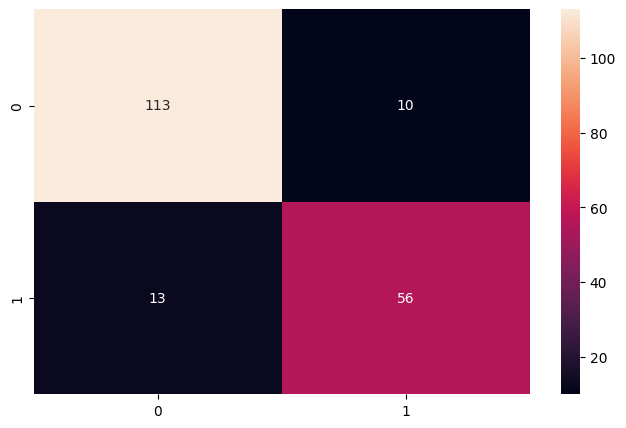

In [67]:
plt.figure(figsize=(8,5))
sns.heatmap(cm, annot=True, fmt='d')

In [96]:
## save tpot code
model.export('tpot_best_pipeline.py')

In [98]:
## save tpot model.pkl file
import joblib

# Save the trained model
joblib.dump(model.fitted_pipeline_, 'model.pkl')


['model.pkl']

In [99]:
model.fitted_pipeline_.named_steps

{'randomforestclassifier': RandomForestClassifier(bootstrap=False, criterion='entropy', max_features=0.55,
                        min_samples_split=19)}

### 4. Explainable AI Techniques

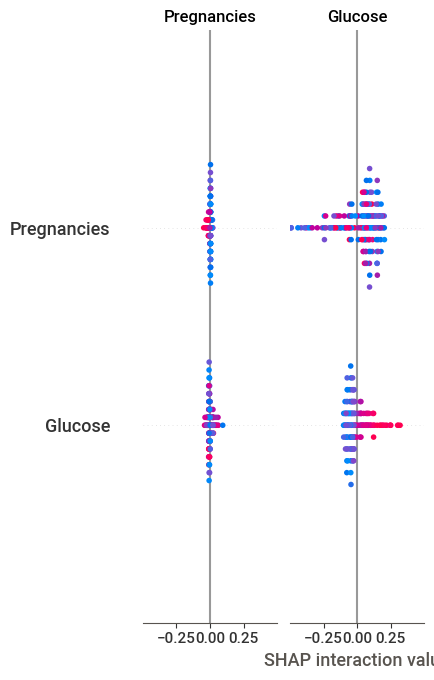

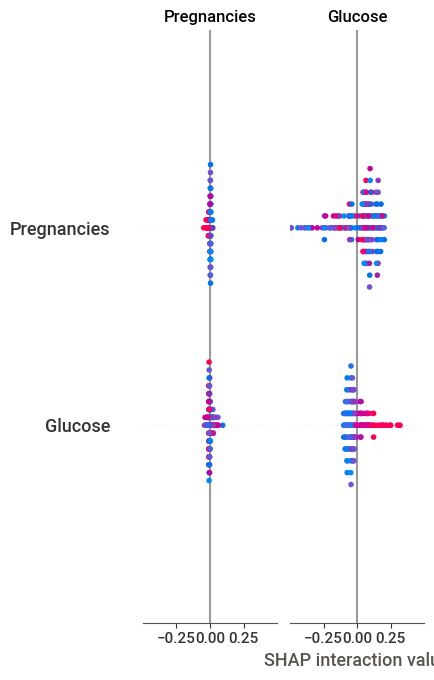

In [106]:
explainer = shap.TreeExplainer(pipeline.named_steps[estimator_name])

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Visualize SHAP values
if isinstance(shap_values, list):
    # For multi-class models
    for i in range(len(shap_values)):
        shap.summary_plot(shap_values[i], X_test, feature_names=X.columns)
else:
    # For binary classification models
    shap.summary_plot(shap_values, X_test, feature_names=X.columns)

# Summarize the effects of all the features
shap.summary_plot(shap_values, X_test, feature_names=X.columns, plot_type="bar")
